# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [ ]:
#note: muon is background so 0 and electron is signal 1
from PIL.ImageColor import colormap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sympy.codegen import Print

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

we can use the .shape() function, and the result for say X_train is of the form of a matrix: (104051, 50)
The # of events for train data =  104051
The # of events for test data =  26013
The # of features for training/test data =  50

Reality check: The addition of features in test and train data sums up to what it was with set X? True
X_train[:,0] means: take all rows (all events) , take column 0 (feature 0)
c=y_train since y_train is array of 0, 1. this acts as binary color map. y_train= 0 for purple and y_train = 1 for yellow.So each event kind of 0,1 is labeled with color


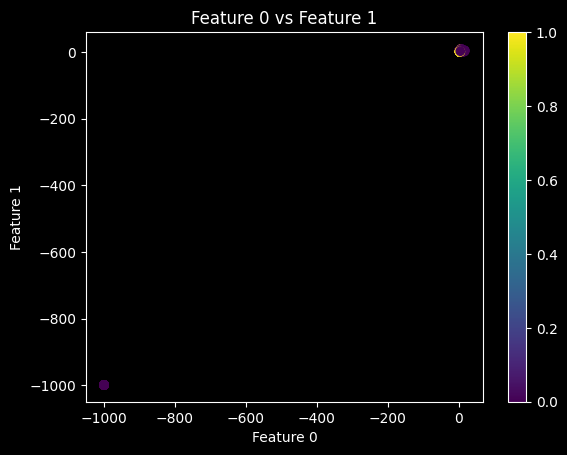

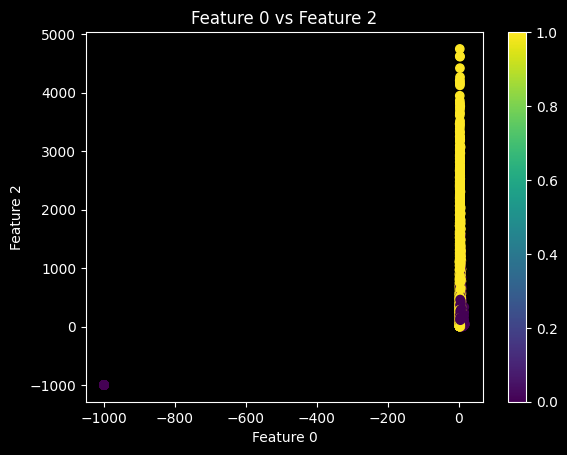

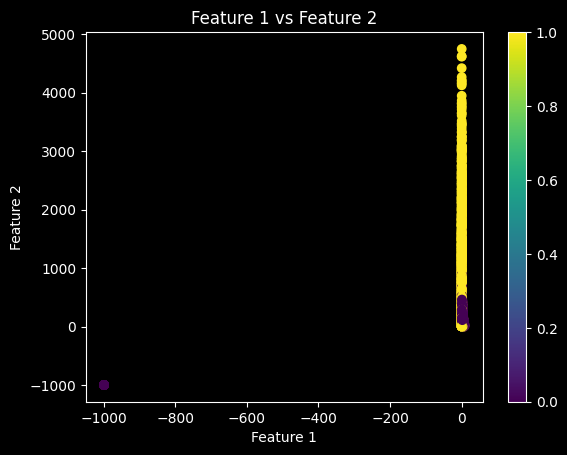

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

print("we can use the .shape() function, and the result for say X_train is of the form of a matrix:", X_train.shape)
print("The # of events for train data = ", X_train.shape[0])
print("The # of events for test data = ", X_test.shape[0])
print("The # of features for training/test data = ", X_test.shape[1])
print()
print("Reality check: The addition of features in test and train data sums up to what it was with set X?", X_train.shape[0]+X_test.shape[0]==X.shape[0])
#print(X_train)


#X_train[:,0] means: take all rows (all events) , take column 0 (feature 0)
# c=y_train since y_train is array of 0, 1. this acts as binary color map. y_train= 0 for purple and y_train = 1 for yellow.


print("X_train[:,0] means: take all rows (all events) , take column 0 (feature 0)")
print("c=y_train since y_train is array of 0, 1. this acts as binary color map. y_train= 0 for purple and y_train = 1 for yellow.So each event kind of 0,1 is labeled with color")

# Plot 1: Feature 0 vs Feature 1
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Feature 0 vs Feature 1")
plt.colorbar()
plt.show()

# Plot 2: Feature 0 vs Feature 2
plt.scatter(X_train[:,0], X_train[:,2], c=y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 2")
plt.title("Feature 0 vs Feature 2")
plt.colorbar()
plt.show()

# Plot 3: Feature 1 vs Feature 2
plt.scatter(X_train[:,1], X_train[:,2], c=y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Feature 1 vs Feature 2")
plt.colorbar()
plt.show()


## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


The tree is created. Here are the scores:
training score is: 0.8940231232760858
testing score is: 0.8912466843501327
The confusion matrix:
[[17567  1091]
 [ 1738  5617]]
AUC = 0.9380973010266955


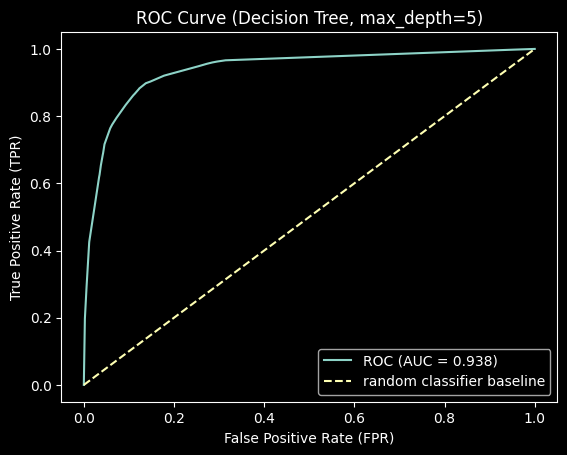

The ROC seems very nice. The AUC value is very promising and high


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import datasets # import inbuild datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc



#Descion tree:





dtclassifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) # although the default is indeed gini anyway
dtclassifier.fit(X_train, y_train)
print("The tree is created. Here are the scores:")
print("training score is:", dtclassifier.score(X_train, y_train))
print("testing score is:", dtclassifier.score(X_test, y_test))


# Confusion matrix is a 2x2 table that compares:
#   True labels (y_test) vs Predicted labels (y_pred)
#
# For binary classification (0/1), it is arranged as:
#   [[TN, FP],
#    [FN, TP]]
# Meaning:
# TN (True Negative): actual 0, predicted 0
# FP (False Positive): actual 0, predicted 1 (background called signal)
# FN (False Negative): actual 1, predicted 0 (signal missed)
# TP (True Positive): actual 1, predicted 1
# In the MiniBooNE setup (typical):
# y = 1 -> electron neutrino (signal)
# y = 0 -> muon neutrino (background)
# So:
# FP = muon background incorrectly flagged as electron signal
# FN = electron signal incorrectly rejected as muon background


y_pred = dtclassifier.predict(X_test)
print("The confusion matrix:")
print(confusion_matrix(y_test,y_pred))


#for ROC and Area under curve (AUC):

# ROC curve plots:
# True Positive Rate (TPR) on the y-axis and False Positive Rate (FPR) on the x-axis.
# TPR (also called sensitivity or recall):
# TPR = TP / (TP + FN)
# Meaning: Of all real signal events (electron?), how many did we correctly identify?
# FPR:
# FPR = FP / (FP + TN)
# Meaning: Of all real background events (muon?), how many did we incorrectly label as signal?


y_prob = dtclassifier.predict_proba(X_test)[:,1]  # # Get predicted probabilities for the positive class =1
x,y,criteria = roc_curve(y_test,y_prob) # x is FPR (false positive rate) and y is TPR (true positive rate)


# Now AUC is area under this curve

auc = auc(x, y)
print("AUC =", auc)

#Here is the plots for ROC

plt.plot(x, y, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--",label="random classifier baseline")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Decision Tree, max_depth=5)")
plt.legend()
plt.show()
print("The ROC seems very nice. The AUC value is very promising and high")



## part 1(c): Gini impurity measure

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

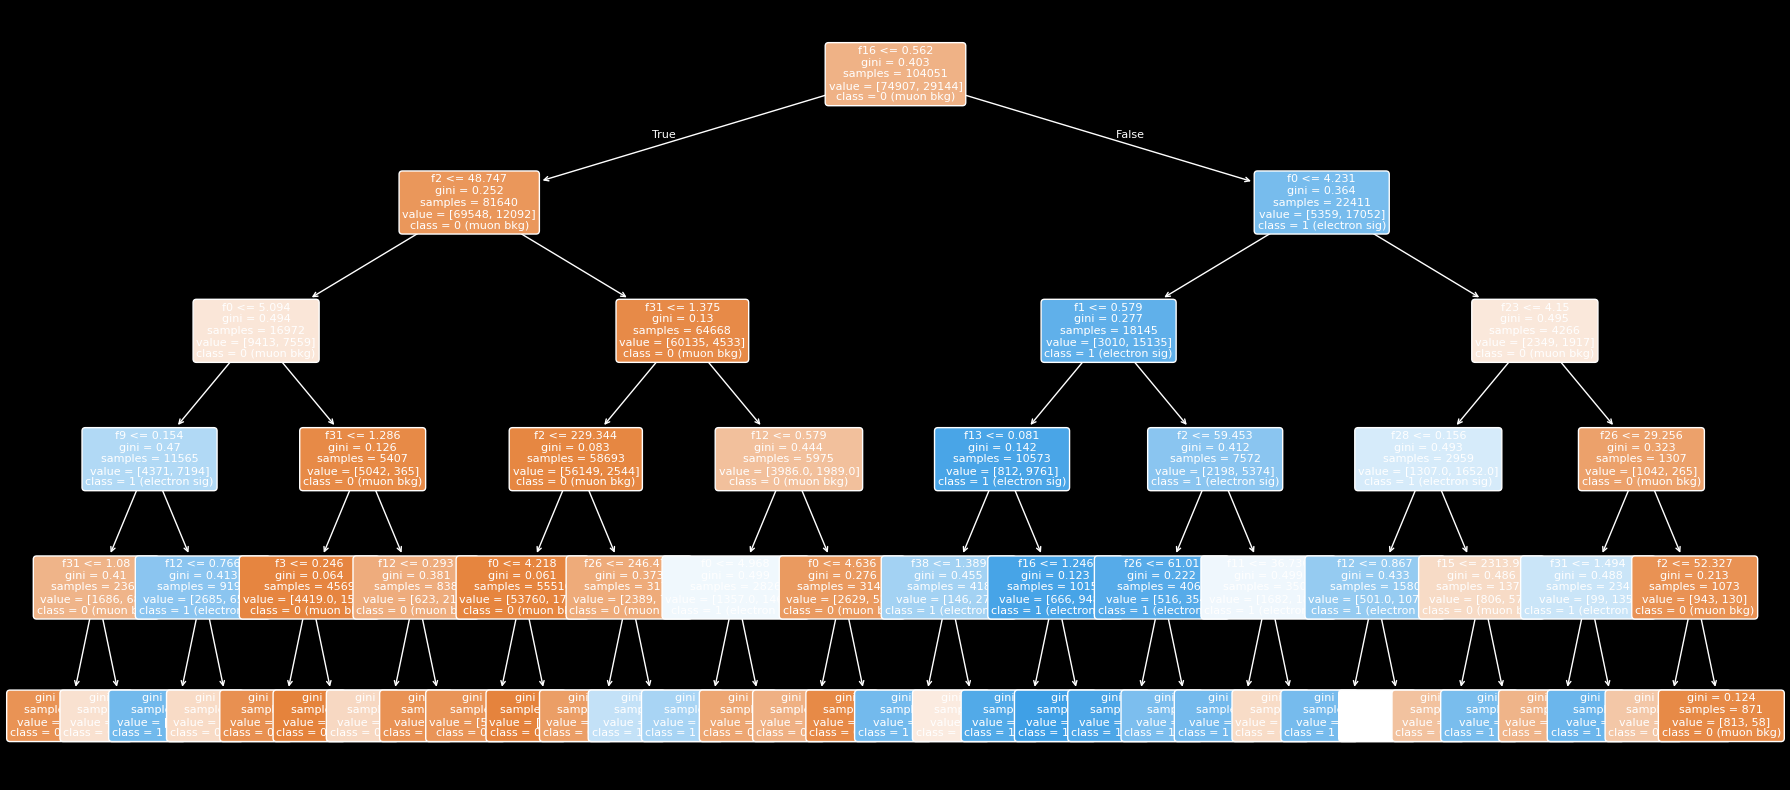

By hands Gini calculation:
for f2<= 48.74:
0.2523520211941337
for f31 <= 1.375:
0.13036594909026356
for f13 <= 0.081:
0.14180249532131373
They all match what we see in tree plot


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 10))
plot_tree(
    dtclassifier,
    filled=True,
    rounded=True,
    feature_names=[f"f{i}" for i in range(X_train.shape[1])], # other wise it would be X[i]
    class_names=["0 (muon bkg)", "1 (electron sig)"], #otherwise would be only 0, and 1
    fontsize=8,
)
plt.show()


#Gini calculation G = 1 - sigma p_k
# => G = 1-p0^2 - p1^2  since we only have 2 classes. Gini quantifies how mixed the classes are in a node.

print("By hands Gini calculation:")
print("for f2<= 48.74:")
print(1-(69548/81640)**2-(12092/81640)**2)
print("for f31 <= 1.375:")
print(1 - (60135/64668)**2 - (4533/64668)**2)
print("for f13 <= 0.081:")
print(1 - (812/10573)**2 - (9761/10573)**2)
print("They all match what we see in tree plot")


# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.



## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.




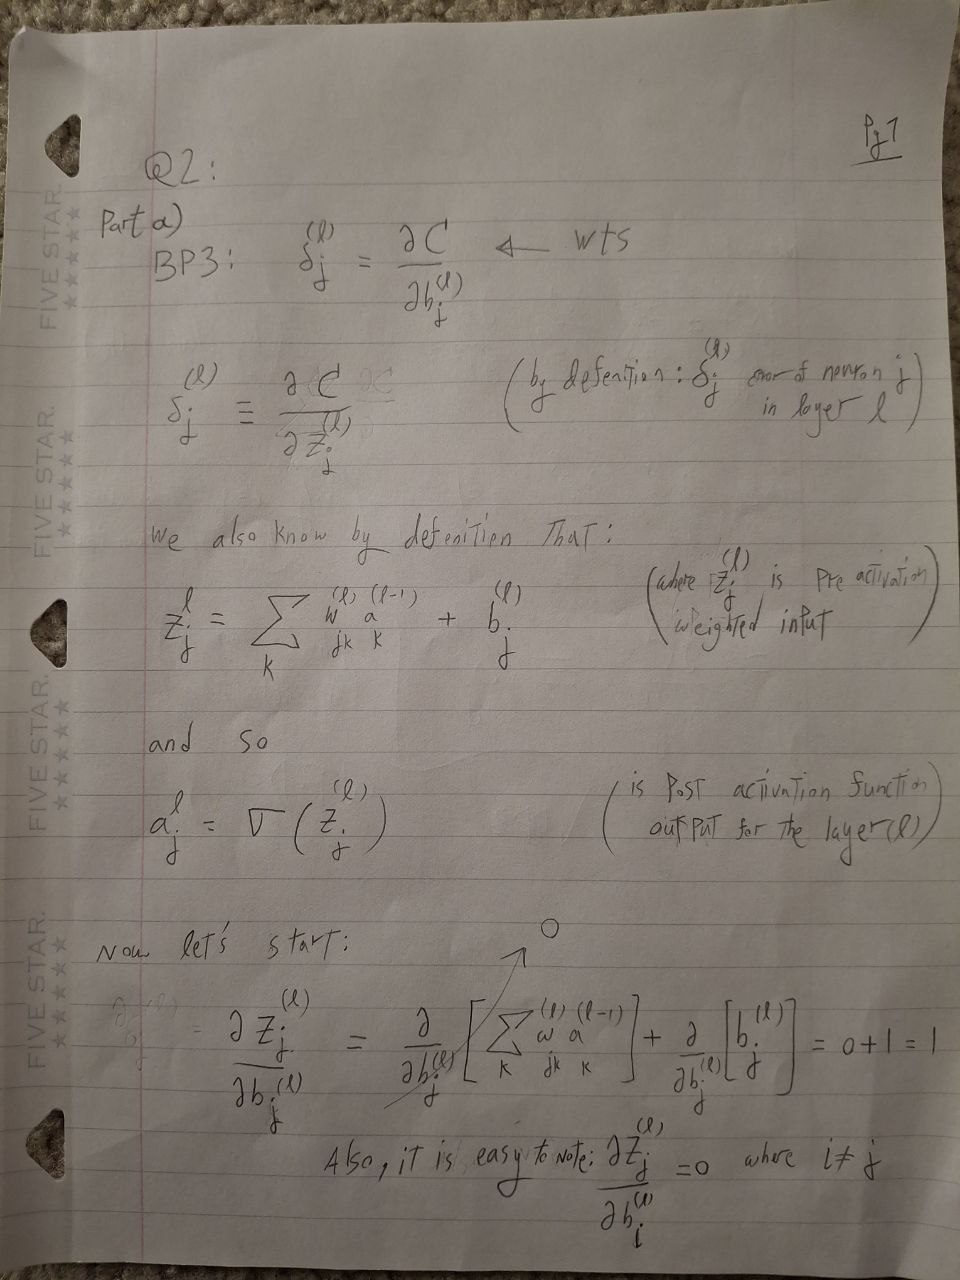

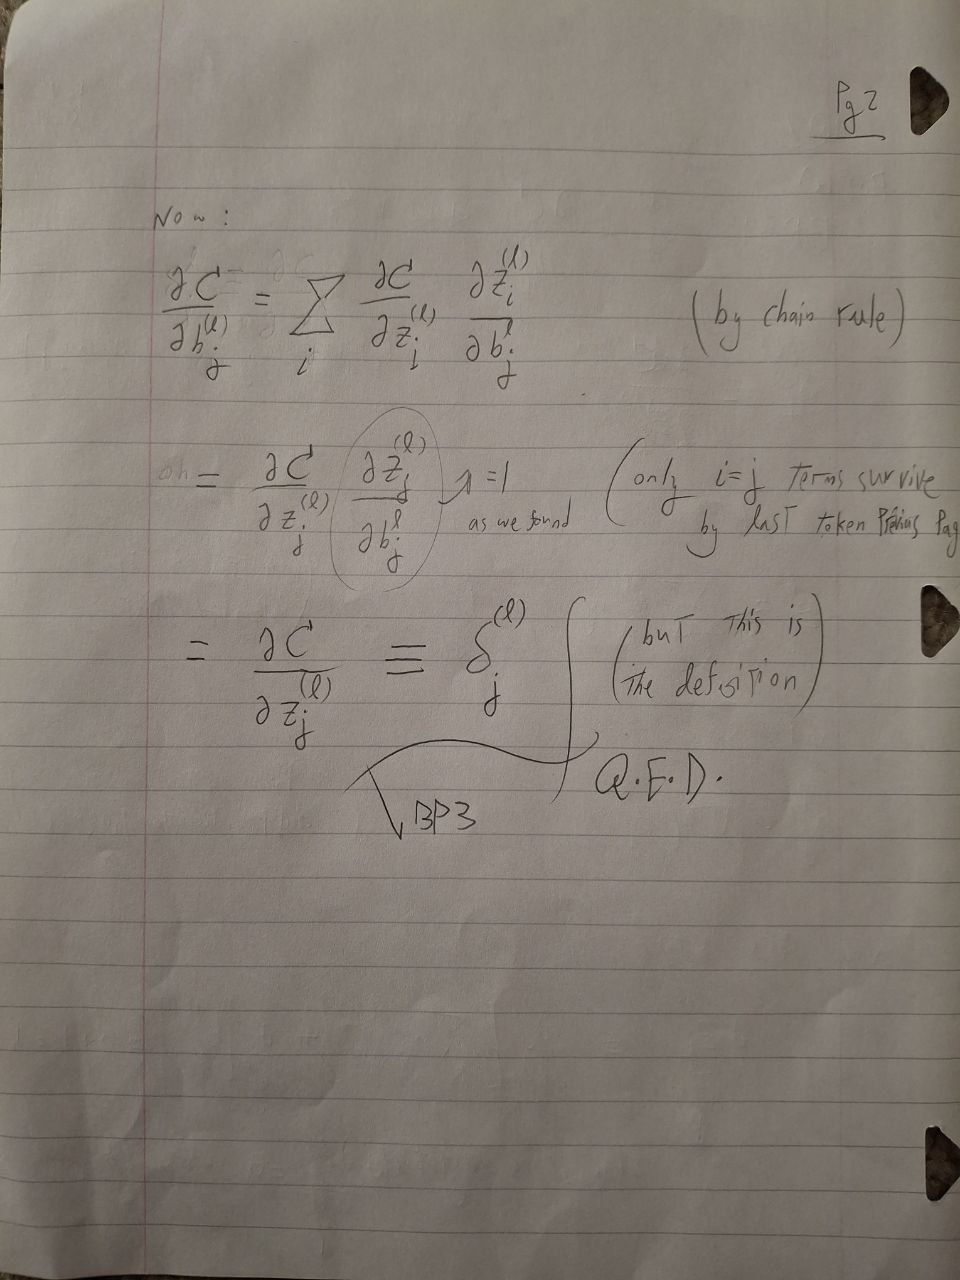

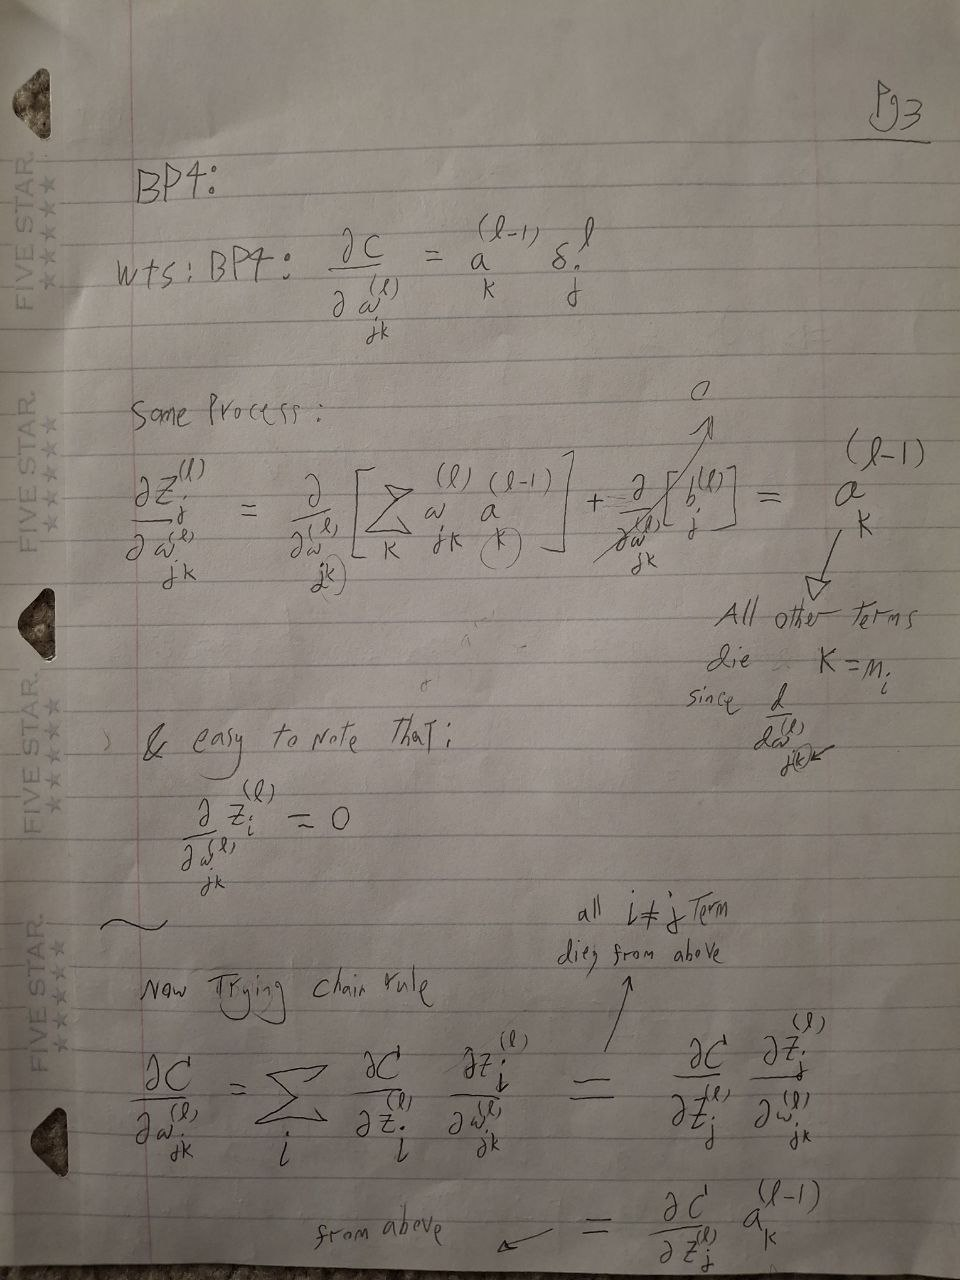

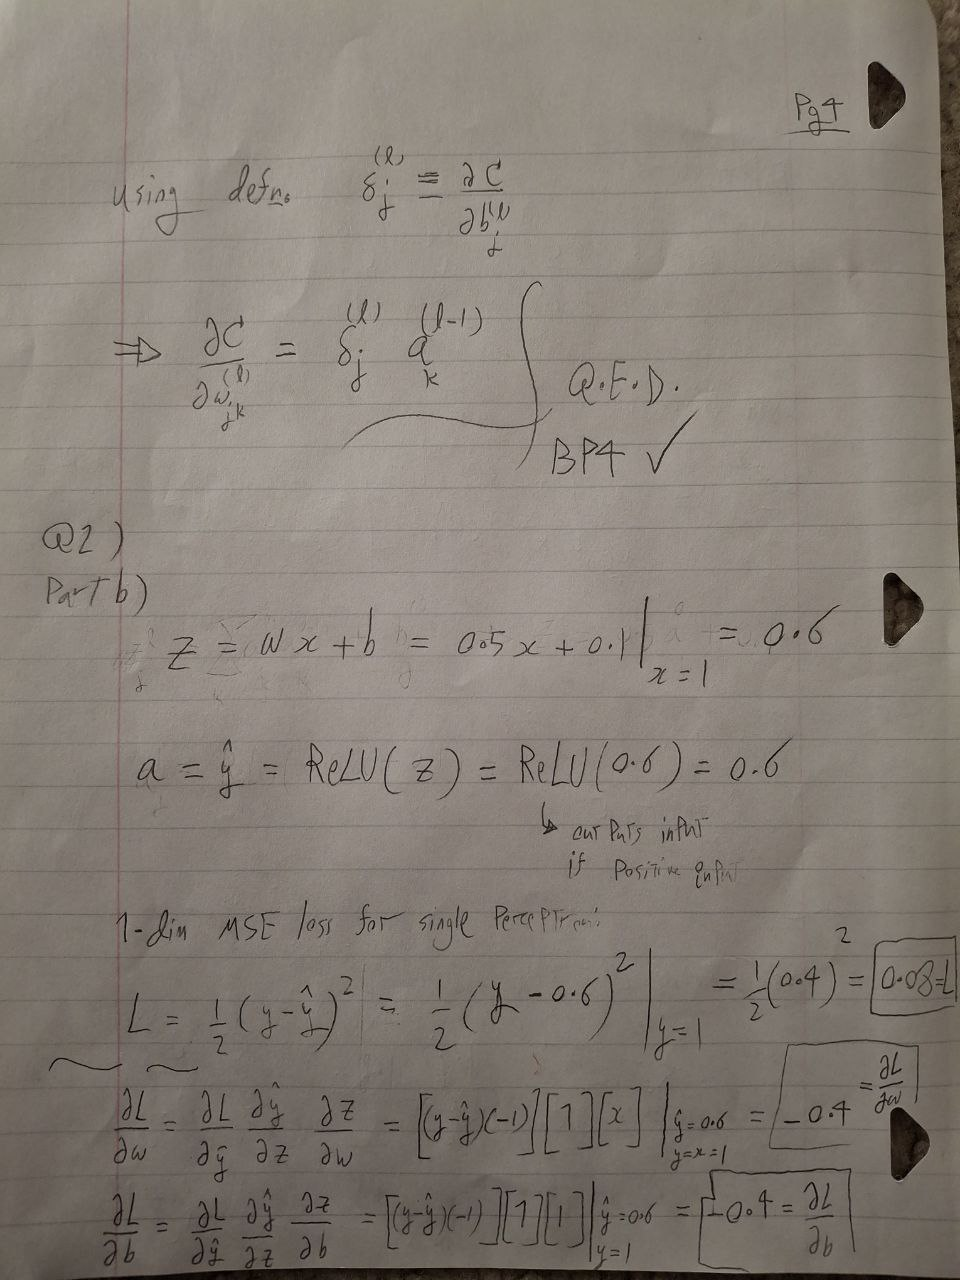

# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix





data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)




# normalize the input features to be within (0,1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)

# y must be float and shape (N,1) for BCELoss + Sigmoid output
y_train = torch.FloatTensor(y_train).unsqueeze(1)
y_test  = torch.FloatTensor(y_test).unsqueeze(1)

# create TensorDataset (AFTER fixing y)
train_dataset = TensorDataset(X_train, y_train)
test_dataset  = TensorDataset(X_test, y_test)


# create PyTorch DataLoader with batches for training
train_loader = DataLoader(
    train_dataset,
    batch_size=128,      # Adjust based on what question wants
    shuffle=True        # Shuffle training data in batches
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128, ## Adjust based on what question wants
    shuffle=False       # Don't shuffle test data
)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Batches per epoch: {len(train_loader)}")





input_dim = X_train.shape[1] # this was 50 features

# define DNN model
model = nn.Sequential(
    nn.Linear(input_dim, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

#loss function as demanded
criterion = nn.BCELoss()

lr = 0.01
# SGD with momentum
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)


# training loop
num_epochs = 50

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Training samples: 104051
Test samples: 26013
Batches per epoch: 813
Epoch [1/50], Loss: 0.2474
Epoch [2/50], Loss: 0.2703
Epoch [3/50], Loss: 0.2215
Epoch [4/50], Loss: 0.2429
Epoch [5/50], Loss: 0.3082
Epoch [6/50], Loss: 0.2415
Epoch [7/50], Loss: 0.2222
Epoch [8/50], Loss: 0.1998
Epoch [9/50], Loss: 0.1735
Epoch [10/50], Loss: 0.3214
Epoch [11/50], Loss: 0.2716
Epoch [12/50], Loss: 0.2425
Epoch [13/50], Loss: 0.2315
Epoch [14/50], Loss: 0.1599
Epoch [15/50], Loss: 0.1888
Epoch [16/50], Loss: 0.2811
Epoch [17/50], Loss: 0.2164
Epoch [18/50], Loss: 0.3208
Epoch [19/50], Loss: 0.2013
Epoch [20/50], Loss: 0.1638
Epoch [21/50], Loss: 0.2496
Epoch [22/50], Loss: 0.2153
Epoch [23/50], Loss: 0.2111
Epoch [24/50], Loss: 0.2442
Epoch [25/50], Loss: 0.1877
Epoch [26/50], Loss: 0.2308
Epoch [27/50], Loss: 0.2533
Epoch [28/50], Loss: 0.1674
Epoch [29/50], Loss: 0.1221
Epoch [30/50], Loss: 0.1906
Epoch [31/50], Loss: 0.1751
Epoch [32/50], Loss: 0.1672
Epoch [33/50], Loss: 0.1525
Epoch [34/50], Lo

## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)



AUC = 0.9737957936039888


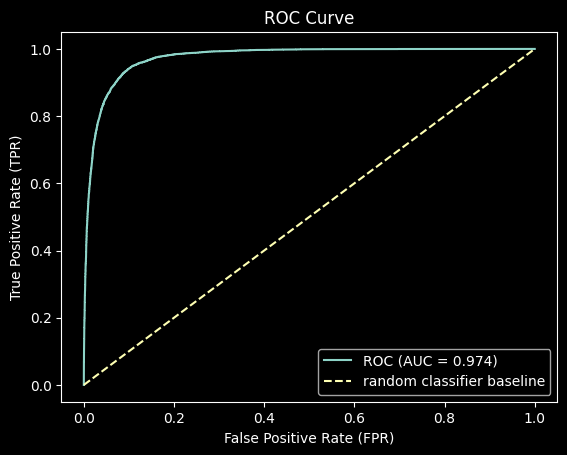

The ROC seems very nice. The AUC value is very promising and high
Confu Matrix:
[[17339  1319]
 [  733  6622]]
hmmm, is it correct....?


In [ ]:


#quality assesments



y_prob = model(X_test).detach().numpy().flatten()
y_true = y_test.detach().numpy().flatten()
x,y,criteria = roc_curve(y_true,y_prob) # x is FPR (false positive rate) and y is TPR (true positive rate)

# Now AUC is area under this curve

roc_auc = auc(x, y)
print("AUC =", roc_auc)

#Here is the plots for ROC

plt.plot(x, y, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--",label="random classifier baseline")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("The ROC seems very nice. The AUC value is very promising and high")



y_pred = model(X_test).detach().numpy().flatten() > 0.5
print("Confu Matrix:")
print(confusion_matrix(y_true, y_pred))
print("hmmm, is it correct....?")

## part 3(c) (10 points): Change of activation function

Replace the sigmoid activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with sigmoid activation functions?

Training samples: 104051
Test samples: 26013
Batches per epoch: 813
Epoch [1/50], Loss: 0.2684
Epoch [2/50], Loss: 0.1999
Epoch [3/50], Loss: 0.2127
Epoch [4/50], Loss: 0.1899
Epoch [5/50], Loss: 0.2792
Epoch [6/50], Loss: 0.2477
Epoch [7/50], Loss: 0.1512
Epoch [8/50], Loss: 0.1881
Epoch [9/50], Loss: 0.1911
Epoch [10/50], Loss: 0.2922
Epoch [11/50], Loss: 0.2472
Epoch [12/50], Loss: 0.2626
Epoch [13/50], Loss: 0.1634
Epoch [14/50], Loss: 0.2046
Epoch [15/50], Loss: 0.2956
Epoch [16/50], Loss: 0.2151
Epoch [17/50], Loss: 0.1692
Epoch [18/50], Loss: 0.1786
Epoch [19/50], Loss: 0.2057
Epoch [20/50], Loss: 0.1516
Epoch [21/50], Loss: 0.2626
Epoch [22/50], Loss: 0.1966
Epoch [23/50], Loss: 0.2230
Epoch [24/50], Loss: 0.2192
Epoch [25/50], Loss: 0.0992
Epoch [26/50], Loss: 0.1553
Epoch [27/50], Loss: 0.1907
Epoch [28/50], Loss: 0.1892
Epoch [29/50], Loss: 0.1566
Epoch [30/50], Loss: 0.1922
Epoch [31/50], Loss: 0.1973
Epoch [32/50], Loss: 0.1992
Epoch [33/50], Loss: 0.1604
Epoch [34/50], Lo

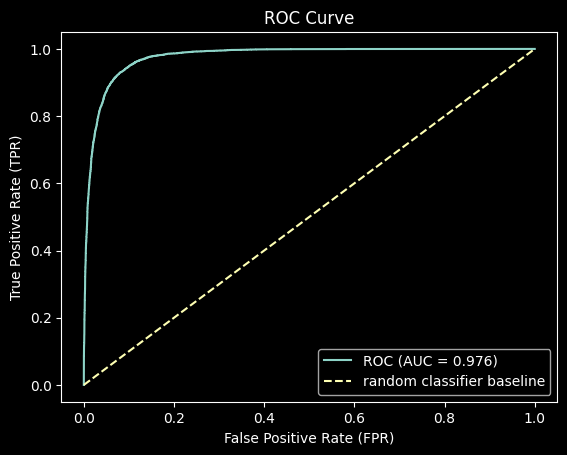

The ROC seems very nice. The AUC value is very promising and high
Confu Matrix:
[[17550  1108]
 [  758  6597]]
hmmm, is it correct....?


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix





data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)




# normalize the input features to be within (0,1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)

# y must be float and shape (N,1) for BCELoss + Sigmoid output
y_train = torch.FloatTensor(y_train).unsqueeze(1)
y_test  = torch.FloatTensor(y_test).unsqueeze(1)

# create TensorDataset (AFTER fixing y)
train_dataset = TensorDataset(X_train, y_train)
test_dataset  = TensorDataset(X_test, y_test)


# create PyTorch DataLoader with batches for training
train_loader = DataLoader(
    train_dataset,
    batch_size=128,      # Adjust based on what question wants
    shuffle=True        # Shuffle training data in batches
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128, ## Adjust based on what question wants
    shuffle=False       # Don't shuffle test data
)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Batches per epoch: {len(train_loader)}")





input_dim = X_train.shape[1] # this was 50 features

# define DNN model
model = nn.Sequential(
    nn.Linear(input_dim, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

#loss function as demanded
criterion = nn.BCELoss()

lr = 0.01
# SGD with momentum
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)


# training loop
num_epochs = 50

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')




#quality assesments



y_prob = model(X_test).detach().numpy().flatten()
y_true = y_test.detach().numpy().flatten()
x,y,criteria = roc_curve(y_true,y_prob) # x is FPR (false positive rate) and y is TPR (true positive rate)

# Now AUC is area under this curve

roc_auc = auc(x, y)
print("AUC =", roc_auc)

#Here is the plots for ROC

plt.plot(x, y, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--",label="random classifier baseline")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("The ROC seems very nice. The AUC value is very promising and high")



y_pred = model(X_test).detach().numpy().flatten() > 0.5
print("Confu Matrix:")
print(confusion_matrix(y_true, y_pred))
print("hmmm, is it correct....?")

In [ ]:
print("The AUC seems to not a change a lot. Slightly better in ReLU version but that's perhaps only fluctuations. The model hardly changes.")

The AUC seems to not a change a lot. Slightly better in ReLU version but that's perhaps only fluctuations. The model hardly changes.
